In [ ]:
import numpy as np
import pandas as pd

In [ ]:
issuesvalues = pd.read_csv('data/issuevalue_short.csv')
issuesvalues.head()

,ideology,socialideology,economicideology,natsecurityideology,repealACA,approvekeystone,iransanctions,transpacificpartnershipact,normalizecubarelations,renewpatriotact,...,moraltrad.familyvalues,egalitarianism.equal,egalitarianism.toofar,egalitarianism.bigprob,egalitarianism.worryless,egalitarianism.notbigprob,egalitarianism.fewerprobs,militarism.strength,militarism.diplomacy,partyid
0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,5.0,1.0,4.0,1.0,5.0,2.0,2.0,2.0,1.0,3.0
1,3.0,3.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,...,5.0,1.0,5.0,5.0,2.0,3.0,2.0,3.0,3.0,7.0
2,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
4,NaN,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,NaN,...,1.0,1.0,3.0,1.0,3.0,1.0,1.0,2.0,2.0,1.0


In [3]:
# check for missing value count per column, unique values and data type
table = pd.DataFrame({
    'Column Name': issuesvalues.columns,
    'Data Type': issuesvalues.dtypes.values,
    'Unique Values': [issuesvalues[col].unique() for col in issuesvalues.columns],
    'Missing Values': issuesvalues.isnull().sum().values
})

table

,Column Name,Data Type,Unique Values,Missing Values
0,ideology,float64,"[2.0, 3.0, 1.0, nan]",64
1,socialideology,float64,"[2.0, 3.0, 1.0, nan]",101
2,economicideology,float64,"[2.0, 3.0, 1.0, nan]",142
3,natsecurityideology,float64,"[2.0, 3.0, 1.0, nan]",115
4,repealACA,float64,"[1.0, 2.0, nan]",14
5,approvekeystone,float64,"[1.0, 2.0, nan]",53
6,iransanctions,float64,"[1.0, 2.0, nan]",22
7,transpacificpartnershipact,float64,"[2.0, 1.0, nan]",44
8,normalizecubarelations,float64,"[2.0, 1.0, nan]",25
9,renewpatriotact,float64,"[2.0, 1.0, nan]",523


In [4]:
issuesvalues.shape

(1000, 53)

In [5]:
issuesvalues['partyid'].value_counts()

partyid
1.0    256
7.0    151
4.0    145
2.0    140
6.0     98
3.0     90
5.0     82
Name: count, dtype: int64

**Ordered Optimal Classification (OOC)** is a classification technique designed to handle ordinal data effectively. Ordinal data refers to data where the categories have a meaningful order but the differences between the categories are not necessarily uniform (e.g., ratings like "Low", "Medium", "High").

In R code, they first load the dataset, reclassify variables (ex:- pid - partyid, CC15_340a, UGA310A, UGA310B, UGA310C - ideology), categorize them, transform into scales and then apply OOC function

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
# Create a separate 'partyid' variable
partyid = issuesvalues['partyid'].copy()  # Create a separate variable
party_mapping = {1: 1, 2: 1, 3: 1, 5: 2, 6: 2, 7: 2}  # Mapping 1,2,3 -> DEM(1), 5,6,7 -> REP(2)
partyid = partyid.map(party_mapping)
partyid[(partyid < 1) | (partyid > 2)] = np.nan  # Set other values to NaN

# Convert 'partyid' to a categorical variable with labels
partyid = pd.Categorical(partyid, categories=[1, 2], ordered=True)
partyid = partyid.rename_categories(["DEM", "REP"])

In [8]:
issuesvalues = issuesvalues.drop('partyid', axis=1)

Applying OOC in R code: 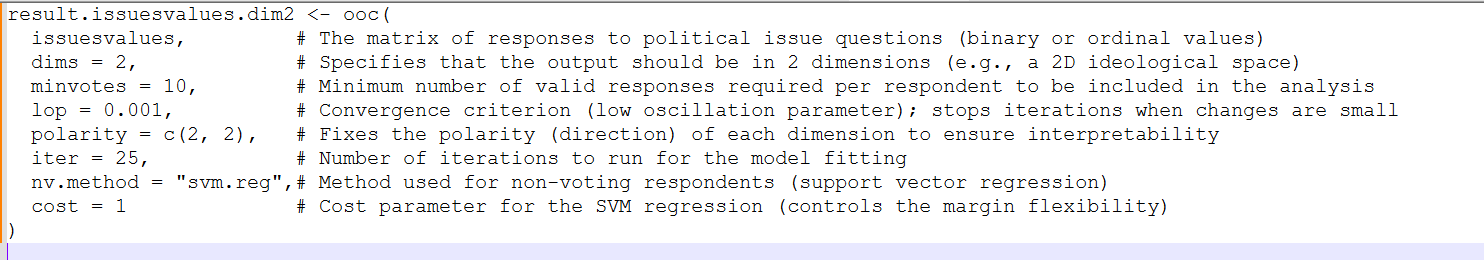

To implement it in python we did follow these steps:

1. Dimension Reduction: Use Principal Component Analysis (PCA) or Multidimensional Scaling (MDS) for dimensionality reduction to map the data into 2 dimensions.
2. Handling Missing Data: Use SVM regression or other imputation techniques to handle missing values.
3. Iterative Convergence: Implement iterative refinement, if needed, using optimization techniques.
4. Visualization: Scatter plot helps visualize respondents in the 2D ideological space.

In [9]:
# Step 1: Handle Missing Data with SVM Regression
def svm_impute(data, cost=1):
    imputed_data = data.copy()
    for col in data.columns:  # Iterate through column names instead of indices
        mask = ~np.isnan(data[col]) # Access column data using column name
        if mask.sum() > 0: # Check if there are any non-missing values
            svr = SVR(C=cost)
            svr.fit(np.where(mask)[0].reshape(-1, 1), data[col][mask]) # Access column data using column name and mask
            missing_indices = np.where(~mask)[0]
            if missing_indices.size > 0: # Check if there are any missing values to impute
                imputed_data.loc[missing_indices, col] = svr.predict(missing_indices.reshape(-1, 1)) # Use .loc for assignment
        # If all values are missing, the column remains unchanged
    return imputed_data

imputed_values = svm_impute(issuesvalues)
imputed_values.head()

,ideology,socialideology,economicideology,natsecurityideology,repealACA,approvekeystone,iransanctions,transpacificpartnershipact,normalizecubarelations,renewpatriotact,...,moraltrad.tolerant,moraltrad.familyvalues,egalitarianism.equal,egalitarianism.toofar,egalitarianism.bigprob,egalitarianism.worryless,egalitarianism.notbigprob,egalitarianism.fewerprobs,militarism.strength,militarism.diplomacy
0,2.00000,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.000000,...,3.0,5.0,1.0,4.0,1.0,5.0,2.0,2.0,2.0,1.0
1,3.00000,3.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0,1.000000,...,5.0,5.0,1.0,5.0,5.0,2.0,3.0,2.0,3.0,3.0
2,1.00000,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.000000,...,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
3,1.00000,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.100647,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
4,2.10009,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.100570,...,2.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,2.0,2.0


In [10]:
imputed_values.shape

(1000, 52)

In [11]:
# Step 2: Standardize the Data
scaler = StandardScaler()
scaled_values = scaler.fit_transform(imputed_values)

In [12]:
# Step 3: Reduce Dimensions to 2 (Using PCA)
pca = PCA(n_components=2)
dimensional_data = pca.fit_transform(scaled_values)
dimensional_data

array([[-1.8467851 ,  1.66983808],
       [ 6.30752156,  0.09251661],
       [-6.40812427, -0.86603877],
       ...,
       [-1.76347017, -0.34324875],
       [-0.43207588,  0.57429367],
       [-0.32894387, -1.41836497]])

In [13]:
# Step 4: Plot Results with partyid
dimensional_df = pd.DataFrame(dimensional_data, columns=["Dimension 1", "Dimension 2"])
dimensional_df["PartyID"] = partyid
dimensional_df.head()

,Dimension 1,Dimension 2,PartyID
0,-1.846785,1.669838,DEM
1,6.307522,0.092517,REP
2,-6.408124,-0.866039,DEM
3,-6.156639,-2.043560,DEM
4,-4.006953,0.211058,DEM


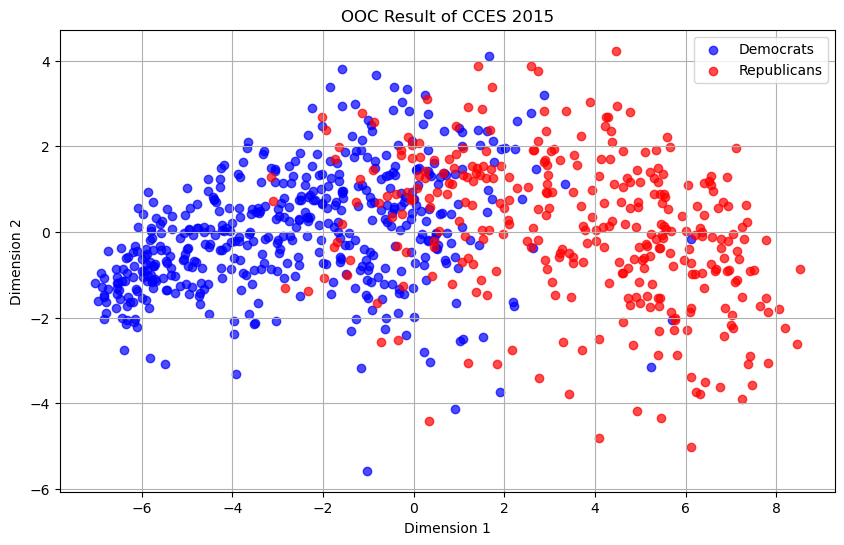

In [14]:
# Separate data by party affiliation
dem_data = dimensional_df[dimensional_df["PartyID"] == 'DEM']
rep_data = dimensional_df[dimensional_df["PartyID"] == 'REP']

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(dem_data["Dimension 1"], dem_data["Dimension 2"], c='blue', label='Democrats', alpha=0.7)
plt.scatter(rep_data["Dimension 1"], rep_data["Dimension 2"], c='red', label='Republicans', alpha=0.7)
plt.title("OOC Result of CCES 2015")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid(True)
plt.show()

Comparison between R code and Python code

Similarity:
1. Data Imputation: Both codes handle missing values using Support Vector Regression (SVR). The Python function svm_impute serves a similar purpose to the nv.method = "svm.reg" parameter in the R ooc function.
2. Dimensionality Reduction: Both codes reduce the dimensionality of the dataset to 2 components. The Python code uses PCA (PCA(n_components=2)), which aligns with the R code's dims=2.
3. Inclusion of partyid: Both codes include partyid for visualization, with Democrats (partyid == 1) and Republicans (partyid == 2) highlighted separately.
4. Visualization: Both codes generate a scatter plot of the reduced dimensions, coloring points based on partyid.

Key Differences:
1. Dimensionality Reduction Method:
 *   R Code: Uses the ooc function, which applies Ordered Optimal Classification (OOC), a method specifically designed for roll-call data and preference analysis.
 *   Python Code: Uses PCA, a general-purpose dimensionality reduction method that may not capture the same political or roll-call specific latent traits.

The Python code does not replicate the exact behavior of the ooc function, as PCA and OOC differ fundamentally in purpose and methodology.




To implement in R, we need OOC package which is not available. 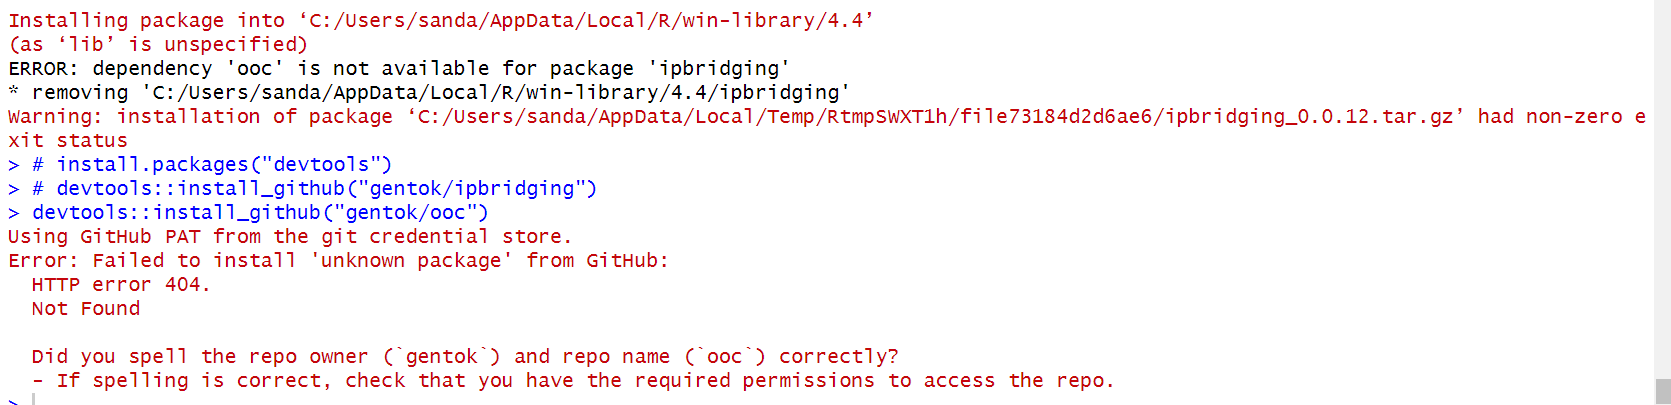